In [22]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [2]:
# Initialize Lists, Counters, and Variables
cities = []
city_data = []
record_count = 1
set_count = 1
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}'

# Print the beginning of the logging.
print(f'Beginning Data Retrieval')
print('-------------------------')

Beginning Data Retrieval
-------------------------


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90,size=1700)
lngs = np.random.uniform(-180,180,size=1700)
lat_lngs = zip(lats, lngs)
coords = list(lat_lngs)

# Identify the nearest city for each latitude and longitude combination.
for coord in coords:
    city = citipy.nearest_city(coord[0],coord[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

686

In [4]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f'{url}&q={city.replace(" ","")}'
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | jablah
Processing Record 7 of Set 1 | chapais
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | birecik
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | outjo
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 15 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | asau
P

Processing Record 22 of Set 4 | keti bandar
City not found. Skipping...
Processing Record 23 of Set 4 | souillac
Processing Record 24 of Set 4 | khandyga
Processing Record 25 of Set 4 | catamarca
Processing Record 26 of Set 4 | port lincoln
City not found. Skipping...
Processing Record 27 of Set 4 | touros
Processing Record 28 of Set 4 | yar-sale
Processing Record 29 of Set 4 | kavieng
Processing Record 30 of Set 4 | murdochville
Processing Record 31 of Set 4 | jaru
Processing Record 32 of Set 4 | omsukchan
Processing Record 33 of Set 4 | ilulissat
Processing Record 34 of Set 4 | fare
Processing Record 35 of Set 4 | husavik
Processing Record 36 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 4 | monaghan
Processing Record 38 of Set 4 | mount gambier
City not found. Skipping...
Processing Record 39 of Set 4 | hobart
Processing Record 40 of Set 4 | grado
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | perevoz
Processing Record 43 of Set

Processing Record 48 of Set 7 | robat karim
City not found. Skipping...
Processing Record 49 of Set 7 | morondava
Processing Record 50 of Set 7 | zaigrayevo
Processing Record 1 of Set 8 | ponta pora
City not found. Skipping...
Processing Record 2 of Set 8 | auki
Processing Record 3 of Set 8 | waingapu
Processing Record 4 of Set 8 | byron bay
City not found. Skipping...
Processing Record 5 of Set 8 | ixtapa
Processing Record 6 of Set 8 | trstenik
Processing Record 7 of Set 8 | dargaville
Processing Record 8 of Set 8 | nguiu
City not found. Skipping...
Processing Record 9 of Set 8 | cuamba
Processing Record 10 of Set 8 | iqaluit
Processing Record 11 of Set 8 | kyra
Processing Record 12 of Set 8 | saint george
City not found. Skipping...
Processing Record 13 of Set 8 | asosa
Processing Record 14 of Set 8 | aden
Processing Record 15 of Set 8 | salta
Processing Record 16 of Set 8 | manjacaze
Processing Record 17 of Set 8 | sexsmith
Processing Record 18 of Set 8 | dalvik
Processing Record 19

Processing Record 23 of Set 11 | berezanskaya
Processing Record 24 of Set 11 | ipojuca
Processing Record 25 of Set 11 | urumqi
Processing Record 26 of Set 11 | altay
Processing Record 27 of Set 11 | del rio
City not found. Skipping...
Processing Record 28 of Set 11 | codrington
Processing Record 29 of Set 11 | lavrentiya
Processing Record 30 of Set 11 | neiafu
Processing Record 31 of Set 11 | hami
Processing Record 32 of Set 11 | dabeiba
Processing Record 33 of Set 11 | mabaruma
Processing Record 34 of Set 11 | peace river
City not found. Skipping...
Processing Record 35 of Set 11 | luau
Processing Record 36 of Set 11 | hofn
Processing Record 37 of Set 11 | stockton-on-tees
Processing Record 38 of Set 11 | khromtau
Processing Record 39 of Set 11 | hay river
City not found. Skipping...
Processing Record 40 of Set 11 | beni suef
City not found. Skipping...
Processing Record 41 of Set 11 | linqiong
Processing Record 42 of Set 11 | eydhafushi
Processing Record 43 of Set 11 | yatou
Processi

In [8]:
len(city_data)

537

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_cols = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_cols]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-08-29 18:06:50,5.41,100.34,84.20,74,20,3.36
1,Bredasdorp,ZA,2020-08-29 18:08:59,-34.53,20.04,44.60,87,70,6.93
2,Avarua,CK,2020-08-29 18:08:32,-21.21,-159.78,73.40,83,2,13.87
3,Jablah,SY,2020-08-29 18:09:00,35.36,35.93,82.40,88,20,4.70
4,Chapais,CA,2020-08-29 18:09:00,49.78,-74.85,55.40,62,90,9.17
5,Kapaa,US,2020-08-29 18:09:00,22.08,-159.32,77.00,88,90,8.05
6,Luderitz,NA,2020-08-29 18:07:52,-26.65,15.16,55.45,60,13,22.15
7,Birecik,TR,2020-08-29 18:09:00,37.03,37.99,84.20,28,0,3.29
8,Kirakira,SB,2020-08-29 18:09:00,-10.45,161.92,78.82,83,96,7.74
9,Outjo,NA,2020-08-29 18:09:00,-20.12,16.15,57.51,31,0,17.83


In [10]:
# Create the output file (CSV).
output_data_file = 'weather-data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label'City_ID')

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

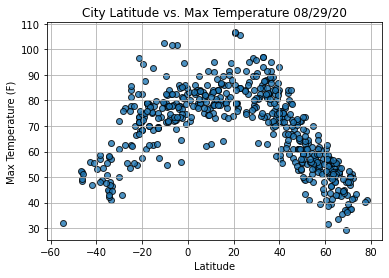

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig1.png")

# Show plot.
plt.show()

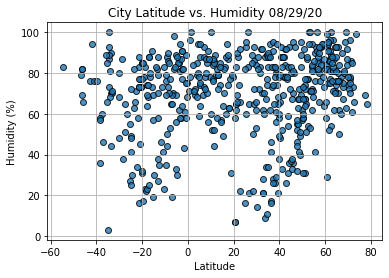

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig2.png")

# Show plot.
plt.show()

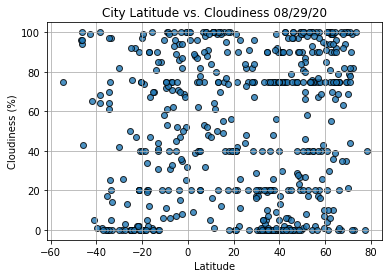

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig3.png")

# Show plot.
plt.show()

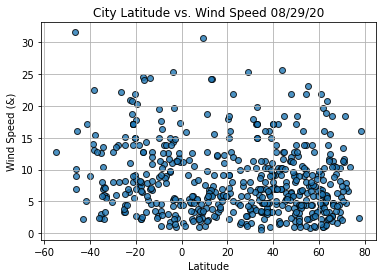

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (&)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather-data/Fig4.png")

# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

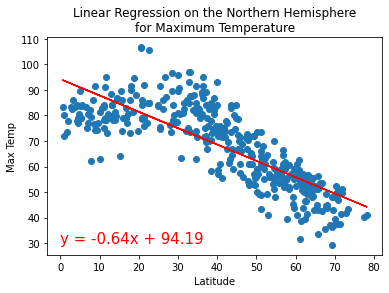

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(0,30))

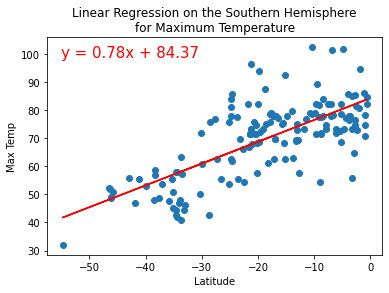

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(-55,99))

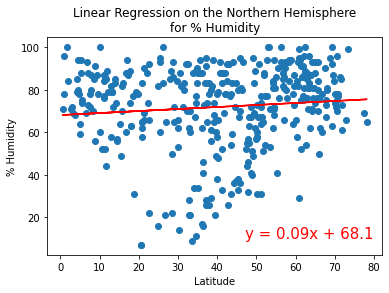

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity',
                       '% Humidity',(47,10))

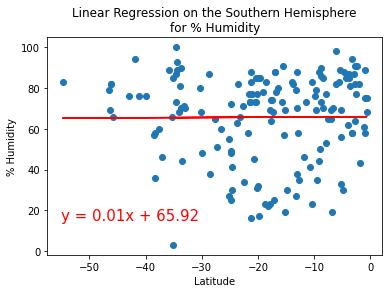

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity',
                       '% Humidity',(-55,15))

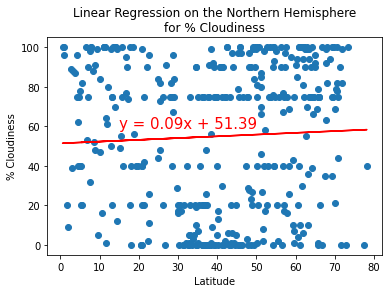

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(15,59))

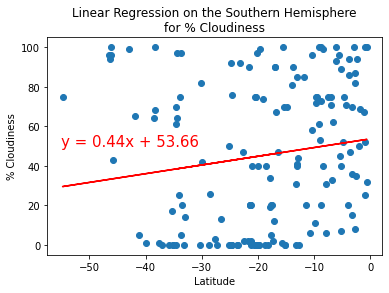

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness',
                       '% Cloudiness',(-55,50))

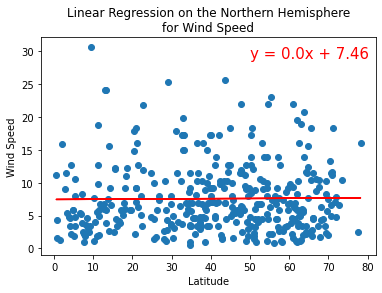

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed',
                       'Wind Speed',(50,29))

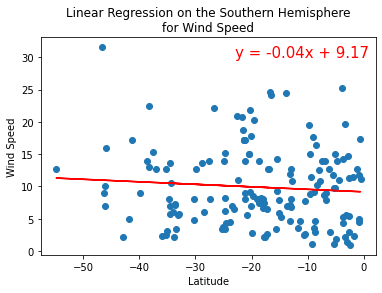

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed',
                       'Wind Speed',(-23,30))